### LAB 1 - HOMEWORK - GROUP D - APPLIED MACROECONOMICS
**Team Member**:
1. Amir Adilkhan
2. Tseeltuul Erdenebat
3. Tram Anh Hoang
4. Kostiantyn Okhrimenko
5. John Dalton Julio Fils Sinord


In [1]:
import os

In [2]:
# Import numerical computations library
import numpy as np

# Import dataframe management library
import pandas as pd

# Import statistics library
import statsmodels.api as sm

# Import statistics library, allows R-like regression syntax
import statsmodels.formula.api as smf

# Import plotting library
import matplotlib.pyplot as plt

### PART A: PLOTS
**Requirement**:
- Plot the histogram of average growth rates between 1980 and 2010. 
- Differentiate between developed, catching-up, and lagging behind countries.
- Make sure the plot title, axis titles, and legend reflect the correct information.

### PART B: SOLOW MODEL

**Task 1**: Assume the following parameters for the country ABC:

\begin{align}
A = 1 \\
α = 1/3 \\
δ = 0.4 \\
n = 0.05 \\
s = 0.5 \\
\end{align}

Calculate the steady-state value of the capital per worker (only up to 4 decimal points). Assume that initial capital per worker is 0.25. Draw a plot by putting time (period) on x-axis and capital per worker on y-axis. Set maximum period to 50. Show the initial level of capital per worker, transition period, and steady-state level of capital per worker clearly.

**Important**: The following tasks are independent of each other!

**Task 2**: Assume now that country ABC is at steady-state and we are in period 30. After 10 years being at steady-state, suddenly people become more prudent and saving rate increased from 0.5 to 0.6 permanently in country ABC. Calculate the new steady-state level of capital per worker in the country ABC (only up to 4 decimal points). On the same plot you drew in Task 1, et maximum period to 100 and show the new steady-state level of capital per worker? Did it increase or decrease? Why? What is the economic intuition behind the change in steady-state level of capital per worker after an increase in saving rate?

**Task 3**: Assume now that country ABC is at initial steady-state you calculated in Task 1. After 10 years reaching steady-state, the war happens and country ABC loses 40% of its capital per worker. However, all parameter values are same as in Task 1 (saving rate is 0.5). Calculate the new steady-state level of capital per worker in the country ABC. On the same plot you drew in Task 1, set maximum period to 100 and show the new steady-state level of capital per worker? Did it increase or decrease or not change? Why or why not? Show the initial level of capital per worker, transition period, and steady-state level of capital per worker clearly.

Hint: you may want to benefit from the codes in the section after homeworks: Optional - Analysis of Saving Rate.

In [3]:
#TASK 1
A = 1
alpha = 1/3
delta = 0.4
n = 0.05
s = 0.5

In [4]:
k_star = (s*A/(delta+n))**(1/(1-alpha))
print("%.4f" % k_star)

1.1712


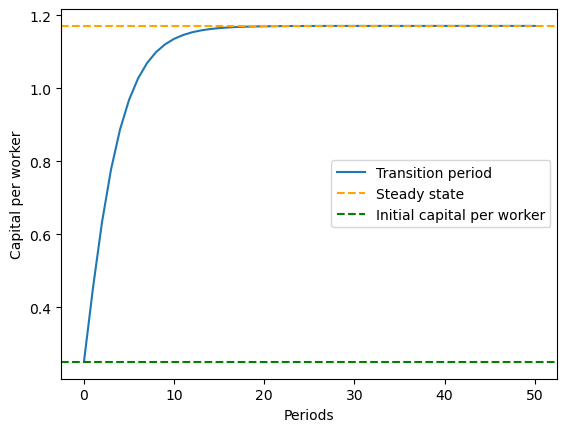

In [5]:
k_0 = 0.25
t_max = 50
k = np.zeros(51)
k[0] = k_0

for t in range(50):
    k[t + 1] = s*A*k[t]**alpha+(1-delta-n)*k[t]

plt.plot(range(51), k, label = "Transition period")
plt.axhline(y=k_star, color='orange', linestyle='--', label='Steady state')
plt.axhline(y=k_0, color='green', linestyle='--', label='Initial capital per worker')
plt.xlabel('Periods')
plt.ylabel('Capital per worker')
plt.legend()

In [6]:
#TASK 2

s2 = 0.6
k_star2 = (s2*A/(delta+n))**(1/(1-alpha))
print("%.4f" % k_star2)

1.5396


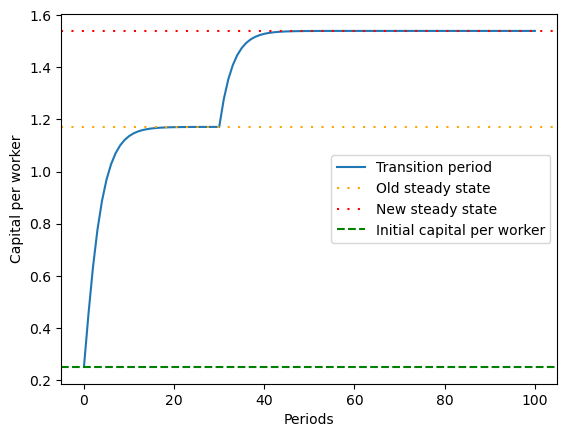

In [7]:
k2 = k
k2 = np.append(k2, np.zeros(50)) 

for t in range(30, 100):
    k2[t + 1] = s2*A*k2[t]**alpha+(1-delta-n)*k2[t]

plt.plot(range(101), k2, label = "Transition period")
plt.axhline(y=k_star, color='orange', linestyle=(0, (1, 4)), label='Old steady state')
plt.axhline(y=k_star2, color='red', linestyle=(0, (1, 4)), label='New steady state')
plt.axhline(y=k_0, color='green', linestyle='--', label='Initial capital per worker')
plt.xlabel('Periods')
plt.ylabel('Capital per worker')
plt.legend()

### ANSWERS TASK 2

**Did it increase or decrease?**

The steady state level of capital per worker increases. (with high saving / investment
rate $s$ and technology level $\bar{A}$ will have higher levels of steady state
capital and output per worker)

**Why?**

Because An increase in s temporarily increases the growth rate of GDP per worker.

**What is the economic intuition behind the change in steady-state level of capital per worker after an increase in saving rate?**

The economic intuition behind the increase in the steady-state capital per worker is
that a higher saving rate means more resources are allocated to investment, which
boosts the capital accumulation process, leading to a higher steady-state capital level.

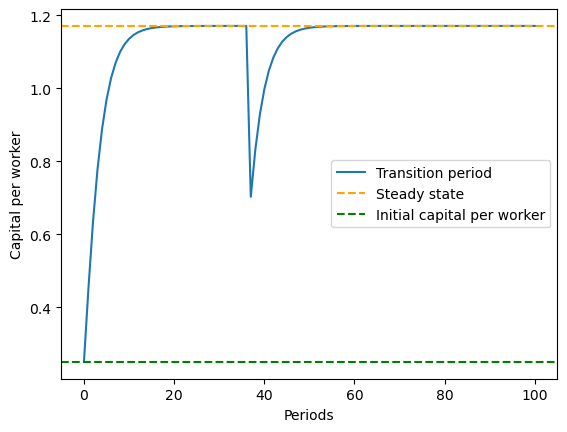

In [8]:
k3 = k
k3 = np.append(k3, np.zeros(50))
war_happened = False
for t in range(100):
    if t - 10 >= 0 and not war_happened:
        if abs(k3[t - 10] - k_star) <= 0.0001:
            k3[t] *= 0.6
            war_happened = True
            
    k3[t + 1] = s*A*k3[t]**alpha+(1-delta-n)*k3[t]

plt.plot(range(101), k3, label = "Transition period")
plt.axhline(y=k_star, color='orange', linestyle='--', label='Steady state')
plt.axhline(y=k_0, color='green', linestyle='--', label='Initial capital per worker')
plt.xlabel('Periods')
plt.ylabel('Capital per worker')
plt.legend()

### ANSWERS TASK 3

**Did it increase or decrease or not change?**

The steady state did not change.

**Why or why not?**


Because the Solow model suggests that economies have a natural tendency to return
to their steady state if their fundamental parameters remain constant (such as the saving
rate, depreciation rate,population growth rate and technology). After the shock, the lower
level of capital per worker temporarily boosts the return on capital, which drives
investment and helps rebuild capital back to its steady state (Resilience). In short, short-term shocks to capital do not permanently alter the steady-state equilibrium.

### PART C: REPLICATION OF MRW USING PWT 10.0

**Task 1**: run an unrestricted estimation on the replication dataset of the human capital augmented Solow model,
with `y_17` as the dependent variable and `s`, `δ_n_g` and `s_h` as independent variables.
Comment on the coefficient signs and explanatory power of the model.

**Task 2**: run a restricted estimation on the replication dataset of the human capital augmented Solow model,
with `y_17` as the dependent variable, and appropriate restrictions as independent variables.
Comment on the implied values of $\alpha$ and $\beta$.

In [9]:
pwt = pd.read_stata('data/pwt100.dta')
pwt.set_index(['country', 'year'], inplace=True)


FileNotFoundError: [Errno 2] No such file or directory: 'data/pwt100.dta'

In [41]:
mrw = pd.read_stata('data/MRW1992.dta')
mrw_countries = mrw['country']
mrw.head()

,country,N,I,O,Y60,Y85,Y_growth,pop_growth,invest,school
0,Algeria,1,1,0,2485.0,4371.0,4.8,2.6,24.100000,4.5
1,Angola,1,0,0,1588.0,1171.0,0.8,2.1,5.800000,1.8
2,Benin,1,0,0,1116.0,1071.0,2.2,2.4,10.800000,1.8
3,Botswana,1,1,0,959.0,3671.0,8.6,3.2,28.299999,2.9
4,Burkina Faso,1,0,0,529.0,857.0,2.9,0.9,12.700000,0.4


In [42]:
not_found = []

for i, country in enumerate(mrw_countries[mrw['N']==1]):
    try:
        temp = np.log(np.mean(pwt.loc[country]['csh_i']))
    except:
        not_found.append(country)

print(not_found)

['CentralAfr. Rep.', 'Congo, Peop. Rep.', 'Ivory Cost', 'Somalia', 'S. Africa', 'Tanzania', 'Zaire', 'Burma', 'Hong Kong', 'Korea, Rep. of', 'Syrian Arab Rep.', 'Germany, Fed. Rep.', 'Dominican Rep.', 'Trinidad & Tobago', 'Bolivia', 'Venezuela', 'Papua New Guinea']


In [43]:
not_found_PWT = ['Central African Republic', 'Congo', "Côte d'Ivoire", 
                 'South Africa', 'U.R. of Tanzania: Mainland', 
                 'D.R. of the Congo', 'Myanmar', 'China, Hong Kong SAR', 
                 'Republic of Korea', 'Syrian Arab Republic', 'Germany', 
                 'Dominican Republic', 'Trinidad and Tobago', 
                 'Bolivia (Plurinational State of)', 'Venezuela (Bolivarian Republic of)']

In [44]:
mrw_pwt_countries = [n for n in mrw_countries[mrw['N']==1].tolist() if n not in not_found]
mrw_pwt_countries = mrw_pwt_countries + not_found_PWT

In [45]:
# Construct replication dataset based on observations for years 1985-2017
s = np.zeros(len(mrw_pwt_countries))
n = np.zeros(len(mrw_pwt_countries))
h = np.zeros(len(mrw_pwt_countries))
y_85 = np.zeros(len(mrw_pwt_countries))
y_17 = np.zeros(len(mrw_pwt_countries))

In [46]:
for i, country in enumerate(mrw_pwt_countries):
    s[i] = np.log(np.mean(pwt.loc[country]['csh_i'][35:]))
    n[i] = np.log(0.05+np.mean(pwt.loc[country]['emp'][35:].pct_change()))
    h[i] = np.mean(pwt.loc[country]['hc'][35:])
    y_85[i] = np.log(pwt.loc[country, 1985]['rgdpo']/pwt.loc[country, 1985]['emp'])
    y_17[i] = np.log(pwt.loc[country, 2017]['rgdpo']/pwt.loc[country, 2017]['emp'])


In [47]:
d = {'y_17': y_17, 'y_85': y_85, 's': s, 'δ_n_g': n, 's_h': np.log(np.log(h)*10)}
mrw_rep = pd.DataFrame(data=d, index=mrw_pwt_countries)
mrw_rep['y_17_85'] = mrw_rep['y_17'] - mrw_rep['y_85']
mrw_rep.head()

,y_17,y_85,s,δ_n_g,s_h,y_17_85
Algeria,10.673525,11.235086,-1.145871,-2.514745,1.838571,-0.561562
Angola,9.602782,8.652294,-1.065619,-2.503920,0.974068,0.950488
Benin,9.050662,8.656473,-1.878282,-2.508623,1.342471,0.394189
Botswana,10.601112,9.596834,-1.302101,-2.517723,2.186768,1.004278
Burkina Faso,8.637341,7.842568,-1.847810,-2.640430,0.072916,0.794774


In [48]:
#running OLS regression
mrw_results = smf.ols('y_17 ~ s + δ_n_g + s_h', data=mrw_rep).fit()
print(mrw_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   y_17   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     71.61
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           7.21e-24
Time:                        10:45:01   Log-Likelihood:                -95.617
No. Observations:                  95   AIC:                             199.2
Df Residuals:                      91   BIC:                             209.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2195      1.539      2.743      0.0

### Interpretation of the coefficients
All coefficients are statistically significant. R-squared shows that 70% of variation in dependent variable can be described trhough this model. 

Coefficient of $s$ equals to 0.9181, meaning that with 1% change in saving per capita, GDP per capita goes up by 0.9181%.

Coefficient of sum of **depreciation, population growth rate and technology growth rate** is negative and equal to -1.92. With 1% growth in this variable, 
GDP per capita goes down by 1.92%. Coefficient of years of schooling is 1.1928. 

With 1% growth in years of **schooling**, GDP per capita goes up by 1.1928%. The signs of the coefficients we obtained are in line with Solow-Swan model.

In [49]:
#construct variables for restricted model
mrw_rep['restricted'] = mrw_rep['s'] - mrw_rep['δ_n_g']

In [50]:
mrw_rep['restricted_h'] = mrw_rep['s_h'] - mrw_rep['δ_n_g']

In [51]:
#running restricted regression
print('\t Restricted regression')
mrw_h_results_restricted = smf.ols('y_17 ~ restricted + restricted_h', data=mrw_rep).fit()
print(mrw_h_results_restricted.summary())

α_β = ((mrw_h_results_restricted.params[1]+mrw_h_results_restricted.params[2])/
       (1+mrw_h_results_restricted.params[1]+mrw_h_results_restricted.params[2]))

print('')
print('Implied α =', mrw_h_results_restricted.params[1] * (1-α_β))
print('Implied β =', mrw_h_results_restricted.params[2] * (1-α_β))


	 Restricted regression
                            OLS Regression Results                            
Dep. Variable:                   y_17   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     108.5
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           6.34e-25
Time:                        10:45:02   Log-Likelihood:                -95.658
No. Observations:                  95   AIC:                             197.3
Df Residuals:                      92   BIC:                             205.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.8147 

C:\Users\adilk\AppData\Local\Temp\ipykernel_8916\1485512777.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  α_β = ((mrw_h_results_restricted.params[1]+mrw_h_results_restricted.params[2])/
C:\Users\adilk\AppData\Local\Temp\ipykernel_8916\1485512777.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (1+mrw_h_results_restricted.params[1]+mrw_h_results_restricted.params[2]))
C:\Users\adilk\AppData\Local\Temp\ipykernel_8916\1485512777.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior

### Interpretation
The coefficients are statistically significant and R-squared shows that approximataly 70% of variation in dependent variable can be explained through the estimated model.

Alpha coefficient is approximately equal to 1/3, which lies in range of plausible values